In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
!pip install tensorflow


In [2]:
df=pd.read_csv(r'D:\study\Telecom_customer_churn\Telco-Customer-Churn.csv')

In [3]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1646,2581-VKIRT,Female,0,Yes,Yes,59,Yes,Yes,DSL,Yes,...,No,Yes,No,No,One year,No,Mailed check,65.5,3801.3,No
4720,8979-CAMGB,Male,1,No,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,102.1,6688.1,No
4425,3059-NGMXB,Male,0,Yes,Yes,14,Yes,Yes,DSL,Yes,...,No,No,No,Yes,Month-to-month,No,Mailed check,69.2,944.65,No
63,0557-ASKVU,Female,0,Yes,Yes,18,Yes,No,DSL,No,...,Yes,Yes,No,No,One year,Yes,Credit card (automatic),54.4,957.1,No
900,1051-GEJLJ,Female,0,No,No,2,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.5,27.55,No


In [4]:
df.drop('customerID',axis='columns',inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [6]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [7]:
#changing TotalCharge column data type from object to float

In [8]:
pd.to_numeric(df.TotalCharges,errors='coerce')#errors='coerce': Any value that cannot be converted to a numeric type will be replaced with NaN (Not a Number). This is useful when dealing with columns that might have some invalid entries that you want to ignore or handle separately.

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [9]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [10]:
df.shape


(7043, 20)

In [11]:
df.iloc[488]['TotalCharges']#just looking at sepecific rows and colomns

' '

In [12]:
df1 = df[df['TotalCharges'].apply(pd.to_numeric, errors='coerce').notnull()]
df1.shape


(7032, 20)

In [13]:
df1['TotalCharges']=df1['TotalCharges'].astype(float) 
df1.dtypes

C:\Users\Nishikanta Nayak\AppData\Local\Temp\ipykernel_30148\3142186892.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['TotalCharges']=df1['TotalCharges'].astype(float)


gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

# EDA

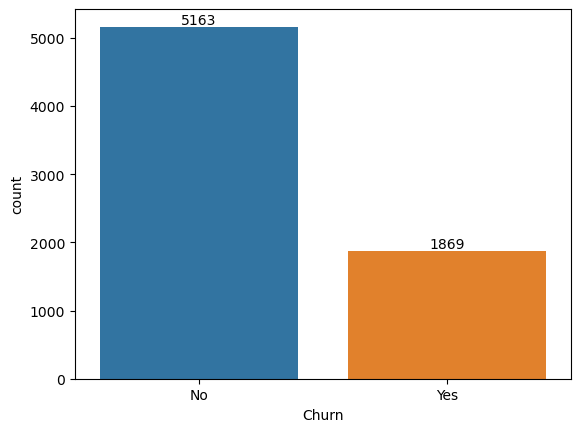

In [14]:
ax=sns.countplot(x='Churn',data=df1)
for bars in ax.containers:
    ax.bar_label(bars)

In [15]:
grouped_df1=df1.groupby(['Churn'],as_index=False).size()

In [16]:
print(grouped_df1)

  Churn  size
0    No  5163
1   Yes  1869


In [17]:
grouped_df1.rename(columns={'size':'Count'})

,Churn,Count
0,No,5163
1,Yes,1869


In [18]:
tenure_churn_no=df1[df1.Churn=='No'].tenure
tenure_churn_yes=df1[df1.Churn=='Yes'].tenure

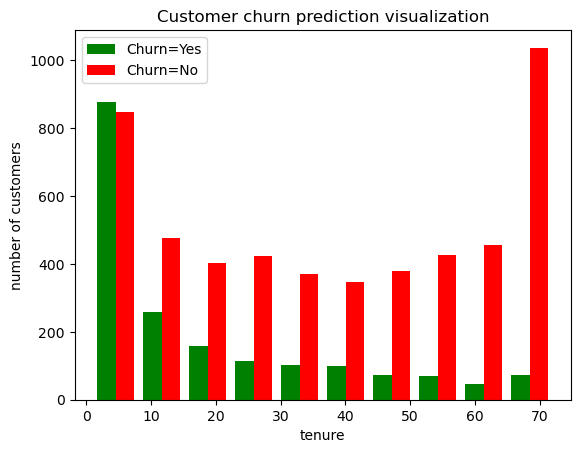

In [19]:
plt.hist([tenure_churn_yes,tenure_churn_no],color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()
plt.xlabel("tenure")
plt.ylabel("number of customers")
plt.title('Customer churn prediction visualization')
plt.show()

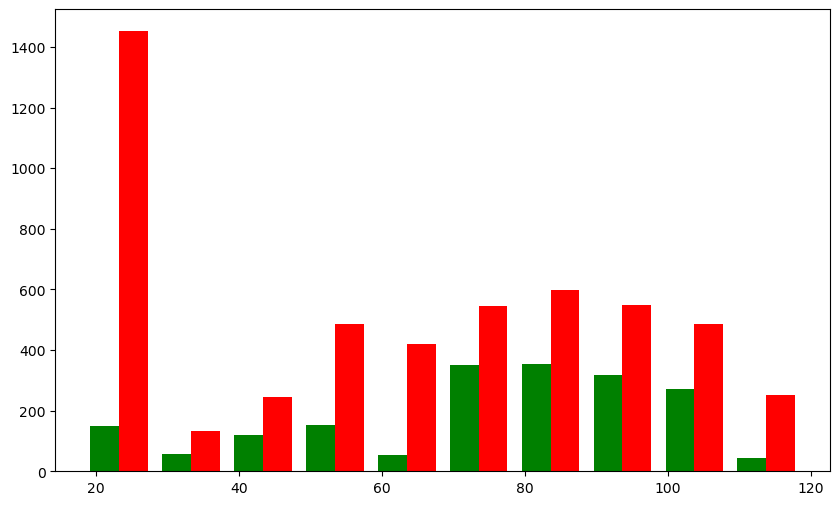

In [20]:
mc_churn_no=df1[df1.Churn=='No'].MonthlyCharges
mc_churn_yes=df1[df1.Churn=='Yes'].MonthlyCharges
plt.figure(figsize=(10, 6))
plt.hist([mc_churn_yes,mc_churn_no],color=['green','red'],label=['Churn=yes','Churn=No'])
plt.xlabel='Monthly Charges'
plt.ylabel='Number of Customers'
plt.title='Customer Churn by Monthly Charges'

In [21]:
def print_unique_col_values(df1):#creating the function
    for columns in df1:
        if df1[columns].dtypes=='object':# keeping only those columns whose data type is object  
            print(f"{columns}:{df1[columns].unique()}")
    

In [22]:
print_unique_col_values(df1)# calling the function

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [23]:
df1.replace('No internet service','No',inplace=True)

C:\Users\Nishikanta Nayak\AppData\Local\Temp\ipykernel_30148\3939576099.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)


In [24]:
print_unique_col_values(df1)#words are replaced

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [25]:
df1.replace('No phone service','No',inplace=True)

C:\Users\Nishikanta Nayak\AppData\Local\Temp\ipykernel_30148\628100714.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)


In [26]:
print_unique_col_values(df1)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [27]:
#replacing yes and no with numbers annd 1 and 0
yes_no_columns=['Partner','Dependents','PhoneService','MultipleLines',
                 'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV',
                 'StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes' : 1,'No': 0},inplace=True)

C:\Users\Nishikanta Nayak\AppData\Local\Temp\ipykernel_30148\4113457138.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes' : 1,'No': 0},inplace=True)


In [28]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)#one hot encoding

C:\Users\Nishikanta Nayak\AppData\Local\Temp\ipykernel_30148\1779930724.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female':1,'Male':0},inplace=True)#one hot encoding


In [29]:
df2=pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'])#dumies variable hot encoding
df2.head(5)
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

# Deep learning


Scaling


In [30]:
#doing Min Max scaling to Tenure Monthlycharges and TotalCharges

In [31]:
cols_to_scale=['tenure', 'MonthlyCharges', 'TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df2[cols_to_scale]=scaler.fit_transform(df2[cols_to_scale])

In [32]:
df2.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [33]:
for col in df2:
    print(f"{col}:{df2[col].unique()}")

gender:[1 0]
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService:[0 1]
MultipleLines:[0 1]
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
Stream

# Train Test Split


In [34]:
x=df2.drop('Churn',axis='columns')
y=df2['Churn']

In [35]:
from sklearn.model_selection import train_test_split#splitting our dataset intp 80 :20 for tairning and testing respectively
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [36]:
len(x_train.columns)

26

In [37]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Input(shape=(26,)),
    layers.Dense(20, activation='relu'),
    layers.Dense(1, activation='sigmoid')])

model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=5)

# need to learn about different models like Sequential
# need to learn about different activation functions
# need to learn about different optimizers
# need to learn about different lossfunctions
# need to learn about different metrices
                          

Epoch 1/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 650us/step - accuracy: 0.5746 - loss: 0.6527
Epoch 2/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 603us/step - accuracy: 0.7822 - loss: 0.4424
Epoch 3/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 648us/step - accuracy: 0.7919 - loss: 0.4334
Epoch 4/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 605us/step - accuracy: 0.7932 - loss: 0.4266
Epoch 5/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step - accuracy: 0.8066 - loss: 0.4217


In [38]:
model.evaluate(x_test,y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step - accuracy: 0.8127 - loss: 0.3995


[0.40739160776138306, 0.8109452724456787]

In [39]:
yp=model.predict(x_test)
yp[:5]

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step


array([[0.02372562],
       [0.00874085],
       [0.15338917],
       [0.1505659 ],
       [0.02202555]], dtype=float32)

In [40]:
y_test[:10]#here 2660 744 64 all are index no and 0 and 1 are prediction output

5401    0
1681    0
2076    0
3359    0
6629    0
149     0
1730    1
5971    0
3050    1
1183    0
Name: Churn, dtype: int64

In [41]:
y_pred=[]
for element in yp:
    if element>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0) 

In [42]:
y_pred[:10]   

[0, 0, 0, 0, 0, 0, 1, 0, 1, 0]

In [43]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1046
           1       0.65      0.56      0.60       361

    accuracy                           0.81      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.81      0.81      1407



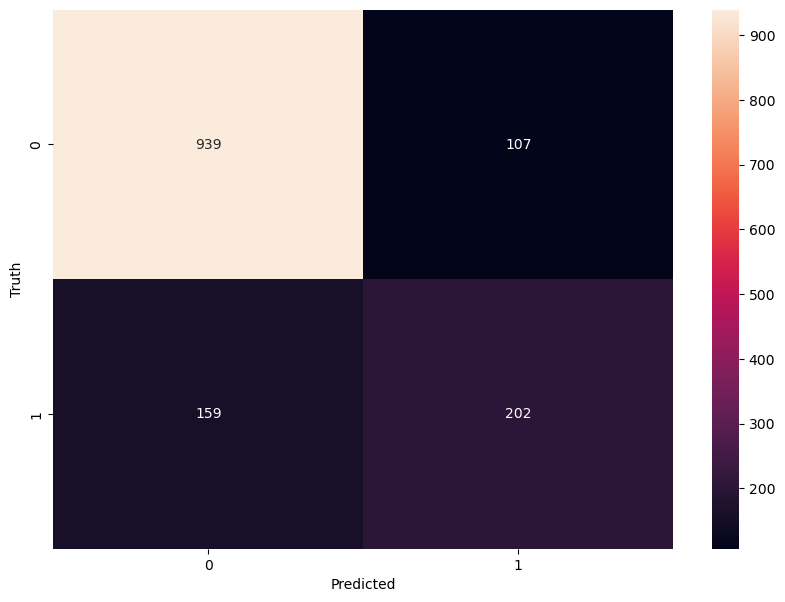

In [44]:
import seaborn as sns
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
plt.figure(figsize=(10,7))
ax=sns.heatmap(cm,annot=True,fmt='d')
ax.set_xlabel('Predicted')
ax.set_ylabel('Truth')
plt.show()           

ACCURACY

In [45]:
round((950+190)/(950+96+190+171),2)# accuracy

0.81

PRECISION for 0 class, Precisons for the person who did not churn

In [46]:
round((950)/(950+171),2)

0.85

PRECISION for 1 class, Precisons for the person who did churn

In [47]:
round((190)/(190+96),2)

0.66

Recall for 0 class

In [48]:
round((950)/(950+96),2)# 950+96 total no of o in churn column

0.91

Recall for 1 class

In [49]:
round((190)/(190+171),2)

0.53